# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In [1]:
#Importo tutte le librerie necessarie

import numpy as np # Libreria per la manipolazione di array e calcoli matematici
import matplotlib.pyplot as plt  # Libreria per la creazione di grafici
import pandas as pd # Libreria per la manipolazione e l'analisi di dati
import scipy.stats as stats # Libreria per statistiche e funzioni scientifiche

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Figure più leggibili

# Imposto le dimensioni del titolo dell'asse
plt.rcParams['axes.titlesize'] = 16

# Imposto le dimensioni delle etichette dell'asse
plt.rcParams['axes.labelsize'] = 14

# Imposto le dimensioni della legenda
plt.rcParams['legend.fontsize'] = 12

# Imposto le dimensioni dei tick sull'asse x
plt.rcParams['xtick.labelsize'] = 12

# Imposto le dimensioni dei tick sull'asse y
plt.rcParams['ytick.labelsize'] = 12

# Disabilito le linee del bordo destro degli assi
plt.rcParams['axes.spines.right'] = False

# Disabilito le linee del bordo superiore degli assi
plt.rcParams['axes.spines.top'] = False

# Imposto la griglia
plt.rcParams['axes.grid'] = True

In [3]:
# Carico i dati da 'test.txt' utilizzando Pandas
data_test = pd.read_csv("test.txt", index_col = False, header = 0, sep = "\s+", names = ["mu", "err_mu", "sigma", "err_sigma"])

# Imposto i parametri
N = 100 # Numero di blocchi
x = np.arange(N) # Genero gli indici dell'asse x

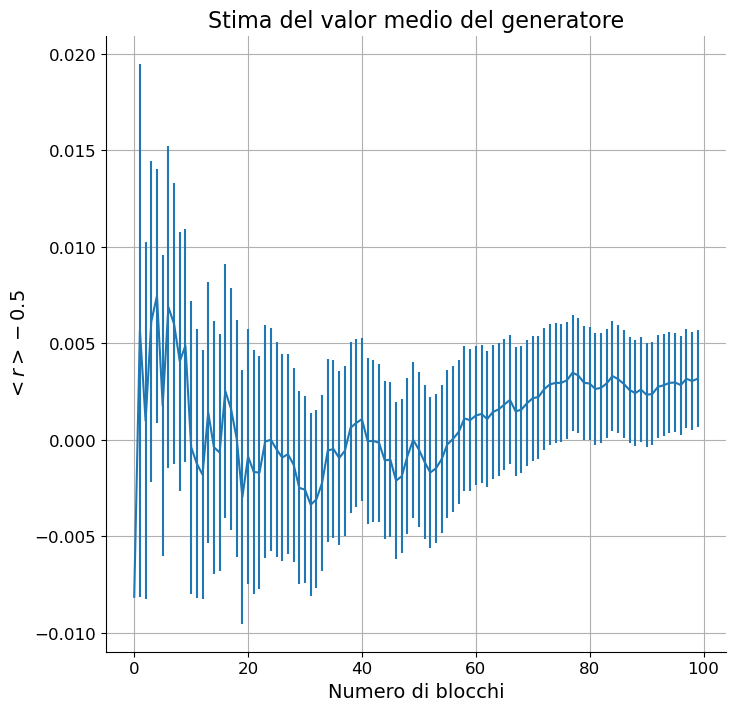

In [4]:
# Creo il grafico a barre con errori
fig = plt.figure(figsize = (8,8))
plt.errorbar(x, data_test.mu - 0.5, yerr =  data_test.err_mu)

# Etichette degli assi
plt.xlabel('Numero di blocchi')
plt.ylabel(r'$<r>-0.5$')

# Titolo
plt.title("Stima del valor medio del generatore")

# Mostro il grafico
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

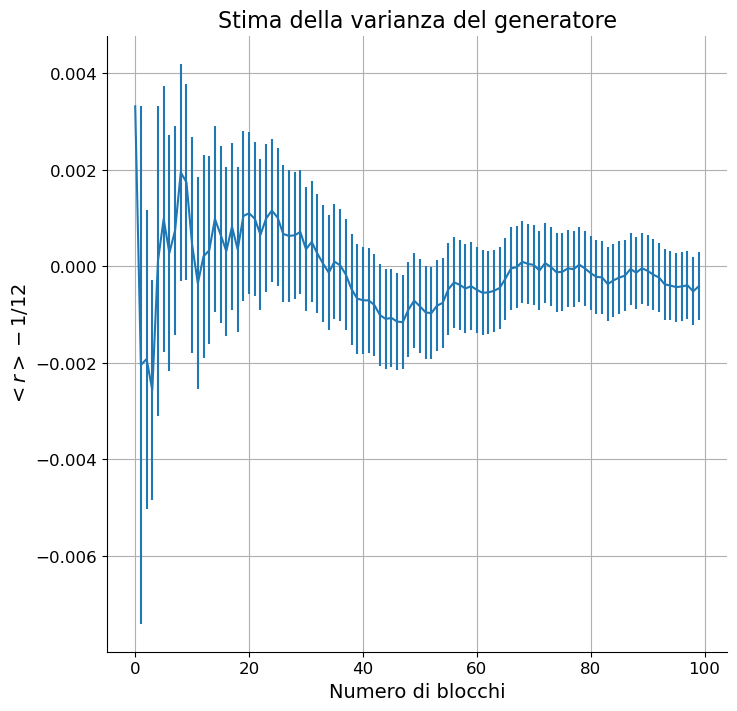

In [5]:
# Creo il grafico a barre con errori
fig = plt.figure(figsize = (8,8))
plt.errorbar(x, data_test.sigma - 1/12, yerr = data_test.err_sigma)

# Etichette degli assi
plt.xlabel('Numero di blocchi')
plt.ylabel(r'$ <r> - 1/12 $')
# Titolo
plt.title("Stima della varianza del generatore")

# Mostro il grafico
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; padding: 1em">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

In [6]:
# Carico i dati da 'chi2.txt' utilizzando Pandas
data_chi2 = pd.read_csv("chi2.txt", index_col = False, header = 0, sep = "\s+", names = ["chi"])

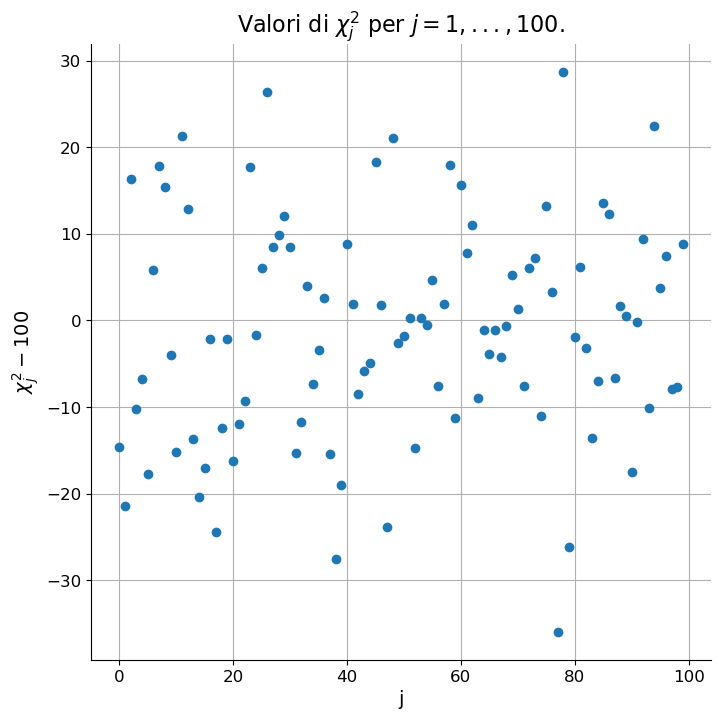

Media dei valori del chi quadrato:  98.6895


In [7]:
# Plot dei valori di chi2 in funzione di x
fig = plt.figure(figsize = (8,8))
plt.plot(x, np.array(data_chi2.chi) - 100, marker = "o", linestyle = "")

# Etichette degli assi
plt.xlabel('j')
plt.ylabel(r'$\chi^2_j - 100$')

# Titolo del grafico
plt.title(r"Valori di $\chi^2_j$ per $j=1,...,100$.")

#Mostro il grafico
plt.show()

print("Media dei valori del chi quadrato: ", np.mean(data_chi2.chi))

Il valore medio ottenuto per il $\chi^2$ è circa 100, cioè il valore che ci aspettavamo. Possiamo quindi scartare con buona ragionevolezza l'ipotesi che i numeri non siano estratti da una distribuzione uniforme.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

In [18]:
# Carico i dati dal file 'unif.txt'
data_unif = pd.read_csv("unif.txt", index_col = False, header = 0, sep = "\s+", names = ["uno", "due", "dieci", "cento"])

# Carico i dati dal file 'exp.txt'
data_exp = pd.read_csv("exp.txt", index_col = False, header = 0, sep = "\s+", names = ["uno", "due", "dieci", "cento"])

# Carico i dati dal file 'Lor.txt'
data_lor = pd.read_csv("Lor.txt", index_col = False, header = 0, sep = "\s+", names = ["uno", "due", "dieci", "cento"])

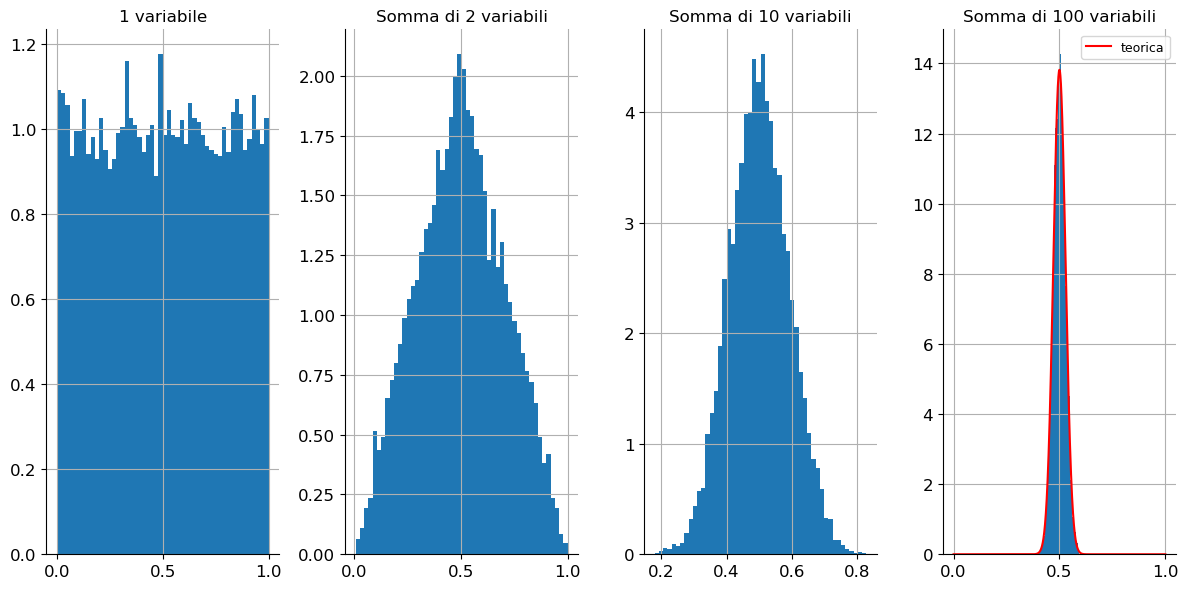

In [9]:
# Parametri della distribuzione normale calcolati con il Teorema del Limite Centrale
media_t = 0.5
var_t = (1/12)/100

# Genero gli indici dell'asse x per la distribuzione teorica
x = np.linspace(0, 1, 10000)

# Distribuzione normale teorica
g = stats.norm(loc = media_t, scale = np.sqrt(var_t))

# Creo una figura con 4 subplot
fig, axx = plt.subplots(1, 4, figsize=(12, 6))

# Istogrammi dei dati della distribuzione uniforme
axx[0].hist(data_unif.uno, bins=50, density=True)
axx[1].hist(data_unif.due, bins=50, density=True)
axx[2].hist(data_unif.dieci, bins=50, density=True)
axx[3].hist(data_unif.cento, bins=50, density=True)

#Titoli
axx[0].set_title("1 variabile", fontsize = 12)
axx[1].set_title("Somma di 2 variabili", fontsize = 12)
axx[2].set_title("Somma di 10 variabili", fontsize = 12)
axx[3].set_title("Somma di 100 variabili", fontsize = 12)

# Sovrapposizione della distribuzione normale teorica sull'ultimo subplot
axx[3].plot(x, g.pdf(x), color = "red", label = "teorica")
axx[3].legend(fontsize = 9)

plt.tight_layout()
# Mostra la figura
plt.show()

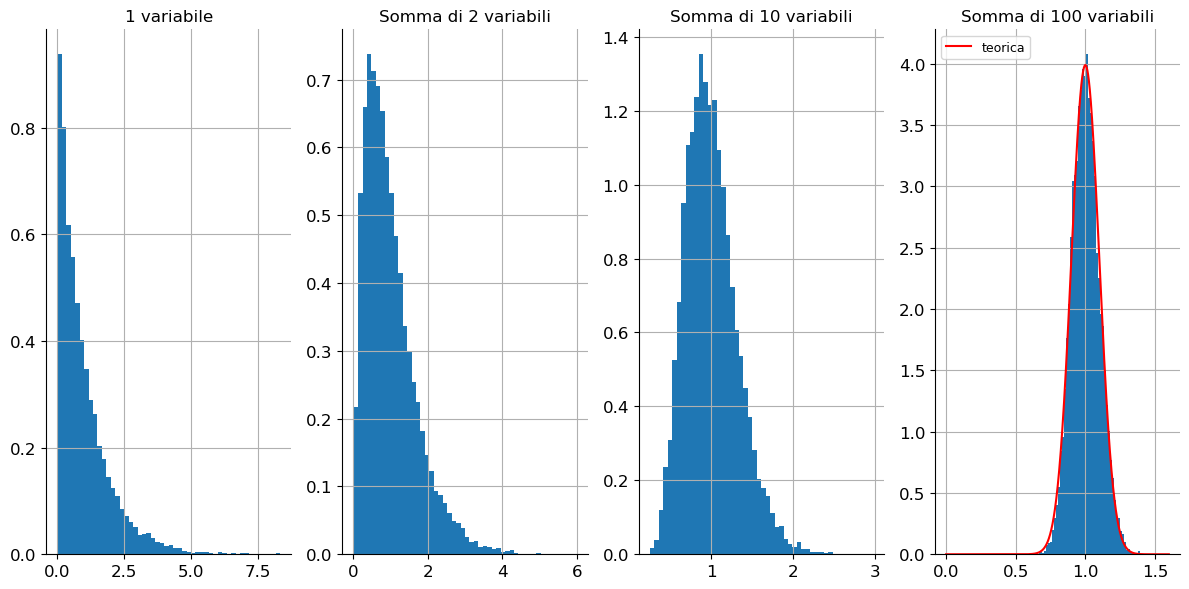

In [10]:
# Parametri della distribuzione normale calcolati con il Teorema del Limite Centrale
media_t = 1.
var_t = 1./100

# Genero gli indici dell'asse x per la distribuzione teorica
x = np.linspace(0,1.6,10000)

# Distribuzione normale teorica
g = stats.norm(loc = media_t, scale = np.sqrt(var_t))

# Creo una figura con 4 subplot
fig, axx = plt.subplots(1, 4, figsize=(12,6))

# Istogrammi dei dati della distribuzione esponenziale
axx[0].hist(data_exp.uno, bins = 50, density = True)
axx[1].hist(data_exp.due, bins = 50, density = True)
axx[2].hist(data_exp.dieci, bins = 50, density = True)
axx[3].hist(data_exp.cento, bins = 50, density = True)

#Titoli
axx[0].set_title("1 variabile", fontsize = 12)
axx[1].set_title("Somma di 2 variabili", fontsize = 12)
axx[2].set_title("Somma di 10 variabili", fontsize = 12)
axx[3].set_title("Somma di 100 variabili", fontsize = 12)

# Sovrapposizione della distribuzione normale teorica sull'ultimo subplot
axx[3].plot(x, g.pdf(x), color = "red", label = "teorica")
axx[3].legend(fontsize = 9)

plt.tight_layout()
# Mostra la figura
plt.show()

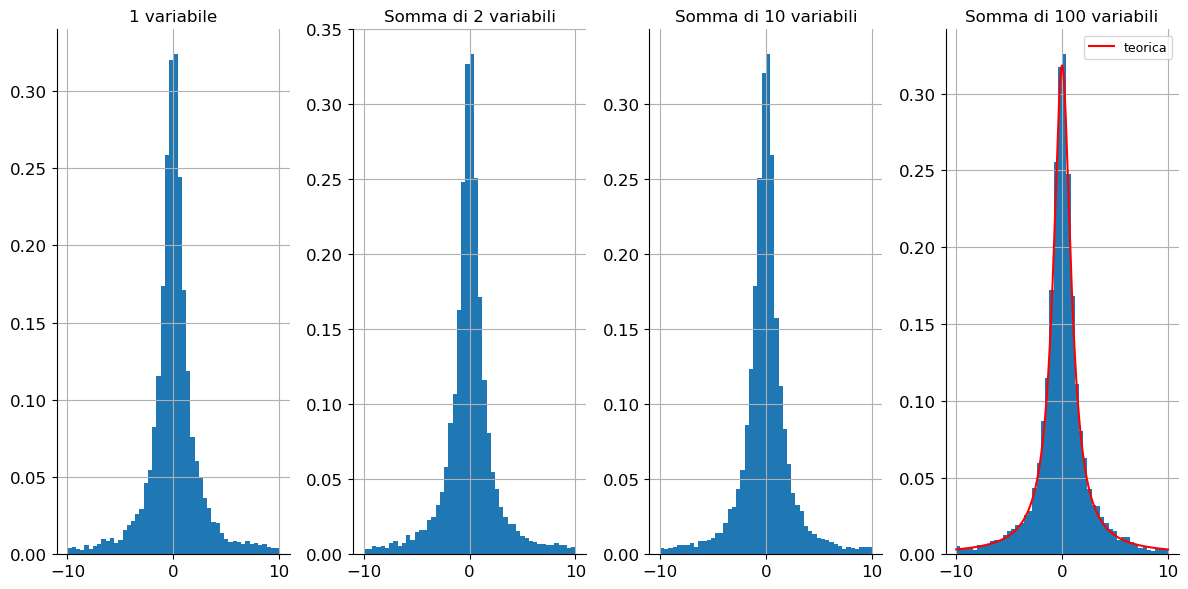

In [41]:
# Parametri della distribuzione di Cauchy-Lorentz
loc_t = 0.
scale_t = 1

x = np.linspace(-10, 10, 10000)

# Distribuzione di Cauchy-Lorentz teorica
cl = stats.cauchy(loc = loc_t, scale = np.sqrt(scale_t))

# Creo una figura con 4 subplot
fig, axx = plt.subplots(1, 4, figsize=(12,6))

# Istogrammi dei dati della distribuzione di Cauchy-Lorentz
axx[0].hist(data_lor.uno, bins = 50, density = True, range = (-10, 10))
axx[1].hist(data_lor.due, bins = 50, density = True, range = (-10, 10))
axx[2].hist(data_lor.dieci, bins = 50, density = True, range = (-10, 10))
axx[3].hist(data_lor.cento, bins = 50, density = True, range = (-10, 10))

#Titoli
axx[0].set_title("1 variabile", fontsize = 12)
axx[1].set_title("Somma di 2 variabili", fontsize = 12)
axx[2].set_title("Somma di 10 variabili", fontsize = 12)
axx[3].set_title("Somma di 100 variabili", fontsize = 12)

# Sovrapposizione della distribuzione di Cauchy-Lorentz teorica sull'ultimo subplot
axx[3].plot(x, cl.pdf(x), color = "red", label = "teorica")
axx[3].legend(fontsize = 9)

plt.tight_layout()
# Mostra la figura
plt.show()

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

In [19]:
# Carico i dati dal file 'buffon.txt'
data_buffon = pd.read_csv("Buffon.txt", index_col = False, header = 0, sep = "\s+", names = ["media","incertezza"])

x = np.arange(N)

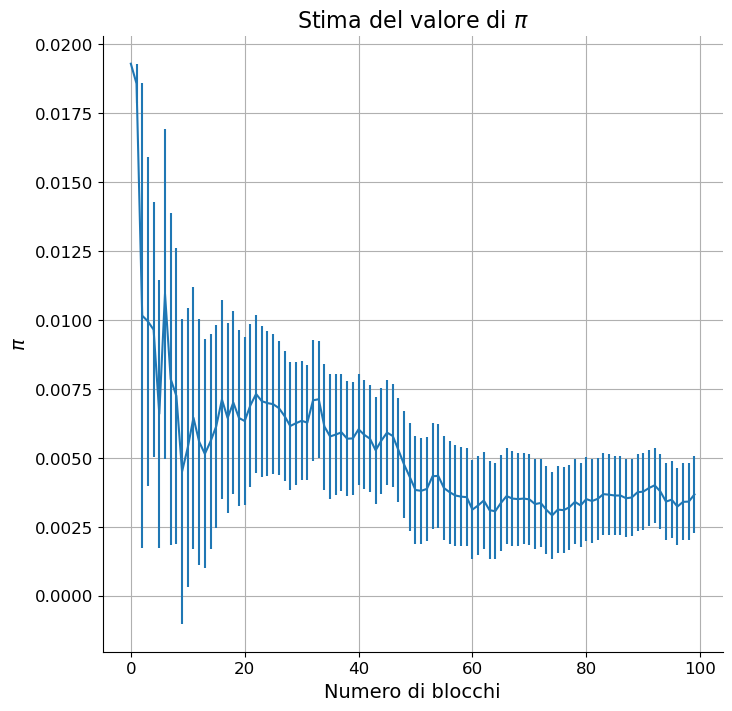

In [21]:
# Creo il grafico a barre con errori
fig = plt.figure(figsize = (8, 8))
plt.errorbar(x, data_buffon.media - np.pi, yerr = data_buffon.incertezza)

# Etichette degli assi
plt.xlabel('Numero di blocchi')
plt.ylabel(r'$\pi$')

# Titolo
plt.title(r"Stima del valore di $\pi$")

# Mostro il grafico
plt.show()

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; padding: 1em">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?

Le limitazioni sono dovute al fatto che se scegliamo N troppo grande otterremo grande precisione nel calcolo dell'incertezza statistica, ma questo porterà inevitabilmente a lentezza computazionale. Al contrario se prendiamo N troppo piccolo non avremo una stima accurata dell'incertezza. Inoltre la scelta del numero di blocchi va anche ad influenzare il numero di "passi" per blocco ($L=N/M$), e un numero di passi troppo piccolo può portare a una stima instabile e inaffidabile dell'incertezza.